# AdaBoost

Load packages

In [28]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import classification_report

Load dataset

In [29]:
df = pd.read_csv("/content/credit_risk_dataset_cleaned.csv")

Split dataset into train and test, random state not specified (using 42 as it has been the most common choice in my experience)

In [30]:
df_split = pd.get_dummies(df, drop_first=True)
X = df_split.drop("cb_person_default_on_file_Y", axis=1)
y = df_split["cb_person_default_on_file_Y"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

AdaBoost model

In [31]:
model = AdaBoostClassifier(random_state=42)
model.fit(X_train, y_train)

train_pred = model.predict(X_train)
test_pred = model.predict(X_test)

Outputting required metrics

In [32]:
metrics_train = classification_report(y_train, train_pred, output_dict=True)
metrics_test = classification_report(y_test, test_pred, output_dict=True)

In [33]:
print(metrics_train)

{'False': {'precision': 0.9519544539332083, 'recall': 0.8340531662509885, 'f1-score': 0.8891122495298619, 'support': 16439.0}, 'True': {'precision': 0.5104091888011486, 'recall': 0.8042986425339367, 'f1-score': 0.6245059288537549, 'support': 3536.0}, 'accuracy': 0.8287859824780976, 'macro avg': {'precision': 0.7311818213671785, 'recall': 0.8191759043924626, 'f1-score': 0.7568090891918084, 'support': 19975.0}, 'weighted avg': {'precision': 0.8737915474247246, 'recall': 0.8287859824780976, 'f1-score': 0.8422713008484745, 'support': 19975.0}}


Train subset

In [34]:
print(f"accuracy: {metrics_train['accuracy']:.3f}")
print(f"precision_0: {metrics_train['False']['precision']:.3f}")
print(f"precision_1: {metrics_train['True']['precision']:.3f}")
print(f"recall_0: {metrics_train['False']['recall']:.3f}")
print(f"recall_1: {metrics_train['True']['recall']:.3f}")
print(f"f1_0: {metrics_train['False']['f1-score']:.3f}")
print(f"f1_1: {metrics_train['True']['f1-score']:.3f}")

accuracy: 0.829
precision_0: 0.952
precision_1: 0.510
recall_0: 0.834
recall_1: 0.804
f1_0: 0.889
f1_1: 0.625


Test subset

In [35]:
print(f"accuracy: {metrics_test['accuracy']:.3f}")
print(f"precision_0: {metrics_test['False']['precision']:.3f}")
print(f"precision_1: {metrics_test['True']['precision']:.3f}")
print(f"recall_0: {metrics_test['False']['recall']:.3f}")
print(f"recall_1: {metrics_test['True']['recall']:.3f}")
print(f"f1_0: {metrics_test['False']['f1-score']:.3f}")
print(f"f1_1: {metrics_test['True']['f1-score']:.3f}")

accuracy: 0.824
precision_0: 0.946
precision_1: 0.507
recall_0: 0.832
recall_1: 0.784
f1_0: 0.886
f1_1: 0.616


# XGBoost

Load packages

In [36]:
import xgboost as xgb

Training model

In [37]:
xgb_model = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss')
xgb_model.fit(X_train, y_train)

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [20:36:43] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, random_state=None, ...)

Predicting results

In [38]:
train_pred = xgb_model.predict(X_train)
test_pred = xgb_model.predict(X_test)

In [39]:
metrics_train = classification_report(y_train, train_pred, output_dict=True)
metrics_test = classification_report(y_test, test_pred, output_dict=True)
print(metrics_train)

{'False': {'precision': 0.9741295349403457, 'recall': 0.9734777054565363, 'f1-score': 0.9738035111205768, 'support': 16439.0}, 'True': {'precision': 0.8770792218776431, 'recall': 0.8798076923076923, 'f1-score': 0.8784413384159254, 'support': 3536.0}, 'accuracy': 0.9568961201501878, 'macro avg': {'precision': 0.9256043784089945, 'recall': 0.9266426988821144, 'f1-score': 0.9261224247682511, 'support': 19975.0}, 'weighted avg': {'precision': 0.9569495646279694, 'recall': 0.9568961201501878, 'f1-score': 0.9569223775694556, 'support': 19975.0}}


Training results

In [40]:
print(f"accuracy: {metrics_train['accuracy']:.3f}")
print(f"precision_0: {metrics_train['False']['precision']:.3f}")
print(f"precision_1: {metrics_train['True']['precision']:.3f}")
print(f"recall_0: {metrics_train['False']['recall']:.3f}")
print(f"recall_1: {metrics_train['True']['recall']:.3f}")
print(f"f1_0: {metrics_train['False']['f1-score']:.3f}")
print(f"f1_1: {metrics_train['True']['f1-score']:.3f}")

accuracy: 0.957
precision_0: 0.974
precision_1: 0.877
recall_0: 0.973
recall_1: 0.880
f1_0: 0.974
f1_1: 0.878


testing results

In [41]:
print(f"accuracy: {metrics_test['accuracy']:.3f}")
print(f"precision_0: {metrics_test['False']['precision']:.3f}")
print(f"precision_1: {metrics_test['True']['precision']:.3f}")
print(f"recall_0: {metrics_test['False']['recall']:.3f}")
print(f"recall_1: {metrics_test['True']['recall']:.3f}")
print(f"f1_0: {metrics_test['False']['f1-score']:.3f}")
print(f"f1_1: {metrics_test['True']['f1-score']:.3f}")

accuracy: 0.823
precision_0: 0.893
precision_1: 0.508
recall_0: 0.890
recall_1: 0.514
f1_0: 0.892
f1_1: 0.511


# Random_forest

Loading libraries and the dataset

In [42]:
# Loading libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from scipy.stats import randint

Training the model

In [43]:
# Random forest definition
rf = RandomForestClassifier(random_state=37)

# Hyperparameters space
param_dist = {
    'n_estimators': randint(100, 500),
    'max_depth': randint(1, 50),
    'min_samples_split': randint(2, 50),
    'min_samples_leaf': randint(2, 50),
    'bootstrap': [True, False]
}

# RandomizedSearchCV
random_search = RandomizedSearchCV(
    rf,
    param_distributions=param_dist,
    n_iter=100,
    cv=5,
    scoring='f1',
    random_state=37,
    n_jobs=-1
)

# Fitting the model
random_search.fit(X_train, y_train)

# Final model
model = random_search.best_estimator_

# Printing best model specification
print(random_search.best_params_)

{'bootstrap': False, 'max_depth': 17, 'min_samples_leaf': 2, 'min_samples_split': 26, 'n_estimators': 378}


Calculating and displaying obtained results on train set

In [44]:
# Prediction of train set
y_pred = model.predict(X_train)

# Calculation of accuracy measures
accuracy = accuracy_score(y_train, y_pred)
precision_0 = precision_score(y_train, y_pred, pos_label=0)
precision_1 = precision_score(y_train, y_pred, pos_label=1)
recall_0 = recall_score(y_train, y_pred, pos_label=0)
recall_1 = recall_score(y_train, y_pred, pos_label=1)
f1_0 = f1_score(y_train, y_pred, pos_label=0)
f1_1 = f1_score(y_train, y_pred, pos_label=1)

# Displaying the results
print(f"accuracy   : {accuracy:.4f}")
print(f"precision_0: {precision_0:.4f}")
print(f"precision_1: {precision_1:.4f}")
print(f"recall_0   : {recall_0:.4f}")
print(f"recall_1   : {recall_1:.4f}")
print(f"f1_0       : {f1_0:.4f}")
print(f"f1_1       : {f1_1:.4f}")

accuracy   : 0.9752
precision_0: 0.9856
precision_1: 0.9275
recall_0   : 0.9843
recall_1   : 0.9330
f1_0       : 0.9849
f1_1       : 0.9302


Calculating and displaying obtained results on test set

In [45]:
# Prediction of test set
y_pred = model.predict(X_test)

# Calculation of accuracy measures
accuracy = accuracy_score(y_test, y_pred)
precision_0 = precision_score(y_test, y_pred, pos_label=0)
precision_1 = precision_score(y_test, y_pred, pos_label=1)
recall_0 = recall_score(y_test, y_pred, pos_label=0)
recall_1 = recall_score(y_test, y_pred, pos_label=1)
f1_0 = f1_score(y_test, y_pred, pos_label=0)
f1_1 = f1_score(y_test, y_pred, pos_label=1)

# Displaying the results
print(f"accuracy   : {accuracy:.4f}")
print(f"precision_0: {precision_0:.4f}")
print(f"precision_1: {precision_1:.4f}")
print(f"recall_0   : {recall_0:.4f}")
print(f"recall_1   : {recall_1:.4f}")
print(f"f1_0       : {f1_0:.4f}")
print(f"f1_1       : {f1_1:.4f}")

accuracy   : 0.8193
precision_0: 0.8917
precision_1: 0.4991
recall_0   : 0.8873
recall_1   : 0.5104
f1_0       : 0.8895
f1_1       : 0.5046


# Logistic_regression

In [46]:
# Loading libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [47]:
# Training the model
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

**In a Jupyter environment, please rerun this cell to show the HTML representation or trust the notebook.**         
**On GitHub, the HTML representation is unable to render, please try loading this page with nbviewer.org.**

Calculating and displaying obtained results on train set

In [48]:
# Prediction of train set
y_pred = model.predict(X_train)

# Calculation of accuracy measures
accuracy = accuracy_score(y_train, y_pred)
precision_0 = precision_score(y_train, y_pred, pos_label=0)
precision_1 = precision_score(y_train, y_pred, pos_label=1)
recall_0 = recall_score(y_train, y_pred, pos_label=0)
recall_1 = recall_score(y_train, y_pred, pos_label=1)
f1_0 = f1_score(y_train, y_pred, pos_label=0)
f1_1 = f1_score(y_train, y_pred, pos_label=1)

# Displaying the results
print(f"accuracy   : {accuracy:.4f}")
print(f"precision_0: {precision_0:.4f}")
print(f"precision_1: {precision_1:.4f}")
print(f"recall_0   : {recall_0:.4f}")
print(f"recall_1   : {recall_1:.4f}")
print(f"f1_0       : {f1_0:.4f}")
print(f"f1_1       : {f1_1:.4f}")

accuracy   : 0.8313
precision_0: 0.9040
precision_1: 0.5220
recall_0   : 0.8895
recall_1   : 0.5608
f1_0       : 0.8967
f1_1       : 0.5407


Calculating and displaying obtained results on test set

In [49]:
# Prediction of test set
y_pred = model.predict(X_test)

# Calculation of accuracy measures
accuracy = accuracy_score(y_test, y_pred)
precision_0 = precision_score(y_test, y_pred, pos_label=0)
precision_1 = precision_score(y_test, y_pred, pos_label=1)
recall_0 = recall_score(y_test, y_pred, pos_label=0)
recall_1 = recall_score(y_test, y_pred, pos_label=1)
f1_0 = f1_score(y_test, y_pred, pos_label=0)
f1_1 = f1_score(y_test, y_pred, pos_label=1)

# Displaying the results
print(f"accuracy   : {accuracy:.4f}")
print(f"precision_0: {precision_0:.4f}")
print(f"precision_1: {precision_1:.4f}")
print(f"recall_0   : {recall_0:.4f}")
print(f"recall_1   : {recall_1:.4f}")
print(f"f1_0       : {f1_0:.4f}")
print(f"f1_1       : {f1_1:.4f}")

accuracy   : 0.8229
precision_0: 0.8978
precision_1: 0.5085
recall_0   : 0.8847
recall_1   : 0.5421
f1_0       : 0.8912
f1_1       : 0.5248


# Training and Testing Results Comparison

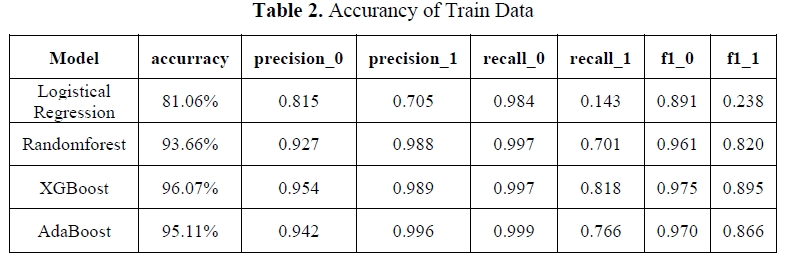

# Training Performance Comparison

| Classifier          | Accuracy | Precision (Class 0) | Precision (Class 1) | Recall (Class 0) | Recall (Class 1) | F1 (Class 0) | F1 (Class 1) |
|---------------------|----------|---------------------|---------------------|------------------|------------------|--------------|--------------|
| Logistic Regression | 0.831    | 0.904               | 0.522               | 0.890            | 0.561            | 0.897        | 0.541        |
| Random Forest       | 0.975    | 0.986               | 0.928               | 0.984            | 0.933            | 0.985        | 0.930        |
| XGBoost             | 0.957    | 0.974               | 0.877               | 0.973            | 0.880            | 0.974        | 0.878        |
| AdaBoost            | 0.829    | 0.952               | 0.510               | 0.834            | 0.804            | 0.889        | 0.625        |

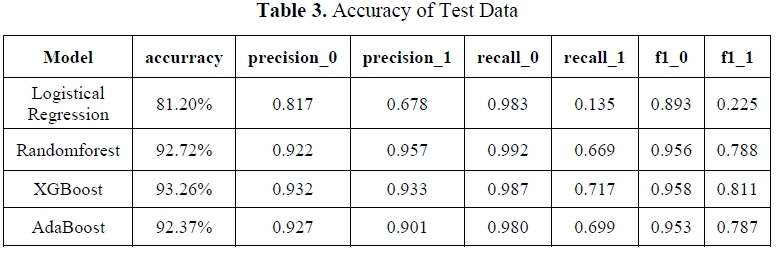

# Testing Performance Comparison

| Classifier          | Accuracy | Precision (Class 0) | Precision (Class 1) | Recall (Class 0) | Recall (Class 1) | F1 (Class 0) | F1 (Class 1) |
|---------------------|----------|---------------------|---------------------|------------------|------------------|--------------|--------------|
| AdaBoost            | 0.824    | 0.946               | 0.507               | 0.832            | 0.784            | 0.886        | 0.616        |
| XGBoost             | 0.823    | 0.893               | 0.508               | 0.890            | 0.514            | 0.892        | 0.511        |
| Random Forest       | 0.819    | 0.892               | 0.499               | 0.887            | 0.510            | 0.890        | 0.505        |
| Logistic Regression | 0.823    | 0.898               | 0.509               | 0.885            | 0.542            | 0.891        | 0.525        |

**Results from research paper and our attempt vary greatly, this is caused by lack of precise information about how the dataset was prepared and randomstate for data split**